In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')
titanic.dropna(subset=['age','fare','sex'],inplace=True)
# titanic.dripna(inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
titanic.describe(include='all')
# titanic['fare'].unique()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,712,714,714,714,184,712,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554,355,413,413,51,554,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


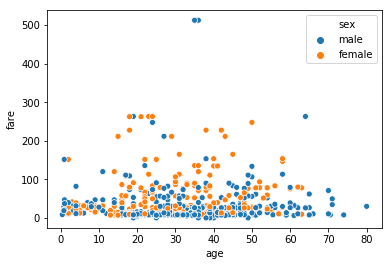

In [7]:
sns.scatterplot(titanic['age'],titanic['fare'],hue=titanic['sex'])

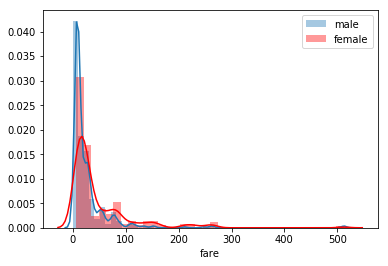

In [39]:
import statsmodels
import statsmodels.stats as stats

male_titanic = titanic.loc[titanic['sex']=='male', 'fare']
female_titanic = titanic.loc[titanic['sex']=='female', 'fare']

sns.distplot(male_titanic)
sns.distplot(female_titanic, color='red')
plt.legend(['male', 'female'])

In [40]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(male_titanic, female_titanic, alternative='larger')

(-5.022960682752042, 0.999999678036049, 712.0)

In [41]:
weightstats.ztest(male_titanic, female_titanic)

(-5.022960682752043, 5.088096366194506e-07)

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('fare ~ age', data = titanic).fit()
print(results.params)
results.summary()

Intercept    24.300901
age           0.349964
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.632
Date:                Thu, 15 Oct 2020   Prob (F-statistic):             0.0102
Time:                        09:00:28   Log-Likelihood:                -3843.0
No. Observations:                 714   AIC:                             7690.
Df Residuals:                     712   BIC:                             7699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3009      4.492      5.410      0.000      15.481      33.120
age            0.3500      0.136      2.575      0.010       0.083       0.617
==============================================================================
Omnibus:                      716.815   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30883.661
Skew:                           4.654   Prob(JB):                         0.00
Kurtosis:                      33.846   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model = sm.OLS.from_formula('fare ~ age', data = titanic)
results = model.fit()
print(results.params)

Intercept    24.300901
age           0.349964
dtype: float64


Text(0.5, 1.0, 'Trend of fare with age')

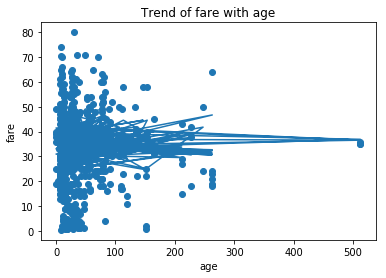

In [44]:
plt.scatter(titanic.fare, titanic.age)
plt.plot(titanic.fare, results.fittedvalues)
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Trend of fare with age')

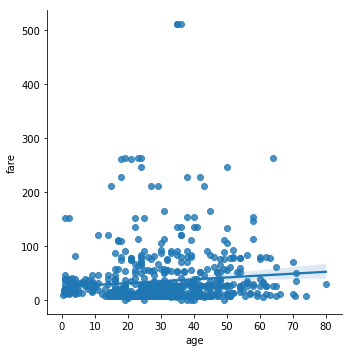

In [45]:
sns.lmplot(x='age', y='fare', data=titanic)

In [46]:
from patsy import dmatrices
y,X = dmatrices('fare ~ age', data=titanic, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'age'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.632
Date:                Thu, 15 Oct 2020   Prob (F-statistic):             0.0102
Time:                        09:00:35   Log-Likelihood:                -3843.0
No. Observations:                 714   AIC:                             7690.
Df Residuals:                     712   BIC:                             7699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3009      4.492      5.410      0.000      15.481      33.120
age            0.3500      0.136      2.575      0.010       0.083       0.617
==============================================================================
Omnibus:                      716.815   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30883.661
Skew:                           4.654   Prob(JB):                         0.00
Kurtosis:                      33.846   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
import numpy as np
titanic['fare_gt_10'] = (titanic['fare']/titanic['age']  > 0.2).astype(np.float32)
titanic['fare_gt_10'].mean()

0.93837535

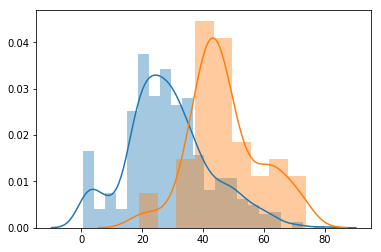

In [48]:
y, X = dmatrices('fare_gt_10 ~age', data=titanic)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

In [49]:
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.186386
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fare_gt_10   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.1946
Time:                        09:00:43   Log-Likelihood:                -133.08
converged:                       True   LL-Null:                       -165.23
Covariance Type:            nonrobust   LLR p-value:                 1.068e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9358      0.544     10.921      0.000       4.871       7.001
age           -0.0856      0.012     -7.337      0.000      -0.108      -0.063
==============================================================================
"""

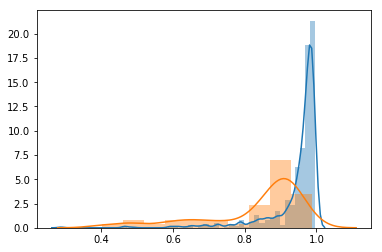

In [50]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

In [51]:
import sklearn.metrics
yhat = result.predict(X) > 0.15
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        44
         1.0       0.94      1.00      0.97       670

    accuracy                           0.94       714
   macro avg       0.47      0.50      0.48       714
weighted avg       0.88      0.94      0.91       714



# chage data

In [59]:
titanic['class_3'] = (np.where(titanic['pclass'] != 3, 0, 1)).astype(np.float32)
titanic['class_2'] = (np.where(titanic['pclass'] != 2, 0, 1)).astype(np.float32)

In [61]:
model = sm.OLS.from_formula('fare ~ class_3 +  class_2', data = titanic)
results = model.fit()
print(results.params)

Intercept    87.961582
class_3     -74.732147
class_2     -66.490026
dtype: float64


In [62]:
from patsy import dmatrices
y,X = dmatrices('fare ~ class_3 +  class_2', data=titanic, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'class_3', 'class_2'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     201.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           5.80e-70
Time:                        09:35:51   Log-Likelihood:                -3686.2
No. Observations:                 714   AIC:                             7378.
Df Residuals:                     711   BIC:                             7392.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9616      3.105     28.327      0.000      81.865      94.058
class_3      -74.7321      3.833    -19.496      0.000     -82.258     -67.206
class_2      -66.4900      4.473    -14.864      0.000     -75.272     -57.708
==============================================================================
Omnibus:                      783.331   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.802
Skew:                           5.128   Prob(JB):                         0.00
Kurtosis:                      47.186   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""